# Credit Score Classification Using an EmbedMLP Neural Network
# Sepideh Forouzi
# I. Introduction

The classification of credit scores is a critical task in the financial services industry, enabling banks and lending institutions to assess the creditworthiness of individuals. Traditional methods often rely on manual processes and rule-based systems, which are time-consuming and prone to error. With recent advancements in Artificial Intelligence (AI) and Machine Learning (ML), particularly Deep Learning, these processes can be automated to significantly improve accuracy and efficiency.

---

## 1. Problem Statement

Based on data collected over the past few years by a global finance company, management aims to build an intelligent system to automatically segregate individuals into credit score brackets, thereby reducing manual effort.  
The objective is to develop an intelligent classification system that categorizes individuals into predefined credit score groups.

---

## 2. Project Aim

This project aims to design and implement a **Neural Network–based multi-class classification model** to categorize individuals into three credit score brackets: **Poor**, **Standard**, and **Good**.  
By leveraging data-driven insights, the model seeks to minimize manual evaluation efforts and enhance decision-making in credit risk assessment.

---

## 3. Project Scope

The primary scope of this project includes:

- Developing an intelligent classification system for predefined credit score brackets  
- Reducing manual effort through automated machine learning–based classification  
- Adopting Neural Network models for multi-class classification to capture complex, non-linear relationships within the data  

This system can support financial institutions in **risk management**, **loan approval**, and **customer segmentation** by providing scalable and accurate predictions.

---

## 4. Dataset

The dataset was obtained from an open Kaggle competition provided by a global finance company. It contains customer banking details and extensive credit-related information.

- **Dataset size:** 100,000 rows  
- **Total features:** 27  
- **Removed redundant columns:** `ID`, `Customer_ID`, `Name`, `SSN`, `Month`  
- **Feature composition:**  
  - 17 numerical features  
  - 9 categorical features  
- **Target labels:**  
  - `Poor`  
  - `Standard`  
  - `Good`

**Data source:**  
https://www.kaggle.com/datasets/parisrohan/credit-score-classification

---

## 5. Tasks

- Develop, train, and refine Neural Network models  
- Perform multi-class classification into three credit score categories:  
  **Poor**, **Standard**, and **Good**

---

## 6. Executive Summary

This project developed and compared multiple machine learning and deep learning models to automate credit score classification into three categories: **Poor**, **Standard**, and **Good**. Following extensive data preprocessing and model evaluation, the **EmbedMLP Neural Network** achieved the best overall performance, with approximately **85.7% accuracy** and a **Macro-F1 score of 0.857**.

The EmbedMLP model outperformed traditional approaches such as Logistic Regression, Decision Tree, and SVM, as well as more complex architectures including RNNs and Transformers. Its ability to effectively handle both numerical and categorical features resulted in strong generalization and balanced classification across all classes.

These results demonstrate the model’s strong potential for real-world credit risk assessment, offering a scalable and accurate solution to reduce manual evaluation efforts and support informed financial decision-making.



##Data Inspection

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Load dataset
from google.colab import files
uploaded = files.upload()
test_data = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')

Saving test.csv to test.csv
Saving train.csv to train.csv


/tmp/ipython-input-3788466262.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

##Data Structure:
27 columns
19 categorical/text columns
8 numeric columns



In [ ]:
#Drop unnecessaries
uneccessaries = ['ID','Customer_ID', 'Name', 'SSN', 'Month']
data.drop(uneccessaries , axis=1 , inplace=True)


In [ ]:
numeric_like_cols = [
    "Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
    "Changed_Credit_Limit", "Outstanding_Debt",
    "Amount_invested_monthly", "Monthly_Balance"
]
for col in numeric_like_cols:
    if col in data.columns:
        # Remove all non-numeric characters except digits, decimal, minus
        data[col] = data[col].astype(str).str.replace(r"[^0-9\.-]", "", regex=True)
        # Convert to numeric
        data[col] = pd.to_numeric(data[col], errors="coerce")

In [ ]:
categorical_cols = [
    "Occupation", "Type_of_Loan", "Credit_Mix",
    "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]

for col in categorical_cols:
    if col in data.columns:
        # Replace placeholder values
        data[col] = data[col].replace(["_", "_______", "NA", "nan", "NaN"], np.nan)

        # Remove leading/trailing spaces and normalize text
        data[col] = data[col].astype(str).str.strip().str.replace("_", " ")

In [ ]:
#Check the percentage of missing value
data.isnull().mean()*100

,0
Age,0.000
Occupation,0.000
Annual_Income,0.000
Monthly_Inhand_Salary,15.002
Num_Bank_Accounts,0.000
Num_Credit_Card,0.000
Interest_Rate,0.000
Num_of_Loan,0.000
Type_of_Loan,0.000
Delay_from_due_date,0.000


In [ ]:
#Missing values handling:
#Filling by mean for the following columns: 'Monthly_Inhand_Salary','Num_of_Delayed_Payment', 'Changed_Credit_Limit'
fill_by_mean = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment', 'Changed_Credit_Limit']
for col in fill_by_mean:
    # Remove anything that's not a digit, decimal, or minus sign
    data[col] = data[col].astype(str).str.replace(r"[^0-9\.-]", "", regex=True)

    # Convert cleaned strings to numeric
    data[col] = pd.to_numeric(data[col], errors="coerce")

    # Fill NaNs with column mean
    data[col] = data[col].fillna(data[col].mean())
#Filling by median for: 'Annual_Income', 'Interest_Rate', 'Total_EMI_per_month'
fill_by_median = ['Annual_Income', 'Interest_Rate', 'Total_EMI_per_month']
fill_by_median = ['Annual_Income', 'Interest_Rate', 'Total_EMI_per_month']

for col in fill_by_median:
    # Remove non-numeric characters (anything not digit, dot, minus)
    data[col] = data[col].astype(str).str.replace(r"[^0-9\.-]", "", regex=True)

    # Convert to numeric
    data[col] = pd.to_numeric(data[col], errors="coerce")

    # Fill NaNs with median
    data[col] = data[col].fillna(data[col].median())


In [ ]:
#Check dupplicate
print(data.duplicated().sum())

0


110.6497


<Axes: xlabel='Age', ylabel='Density'>

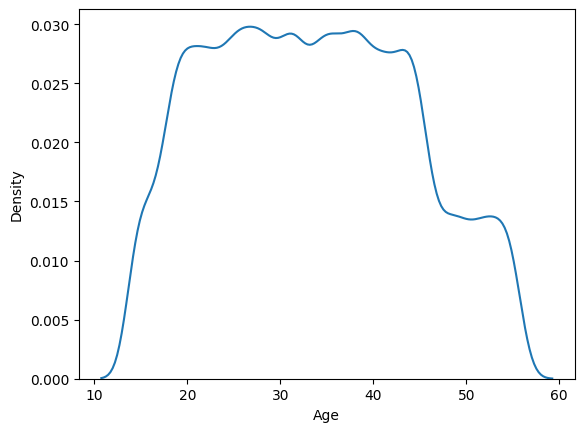

In [ ]:

#The mean of Age showed the outliers
print(data.Age.mean())

data = data[(data['Age'] >= 0) & (data['Age'] <= 90)]

sns.kdeplot(data['Age'])


##Exploratory analysis of the  dataset

In [ ]:
#Explore the distribution of numeric variables:
def plot_histogram(df, columns, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
      if i < len(axes):
        sns.histplot(df[column], kde=True, ax=axes[i], bins=100)
        axes[i].set_title(column)
        axes[i].set_xlabel('')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

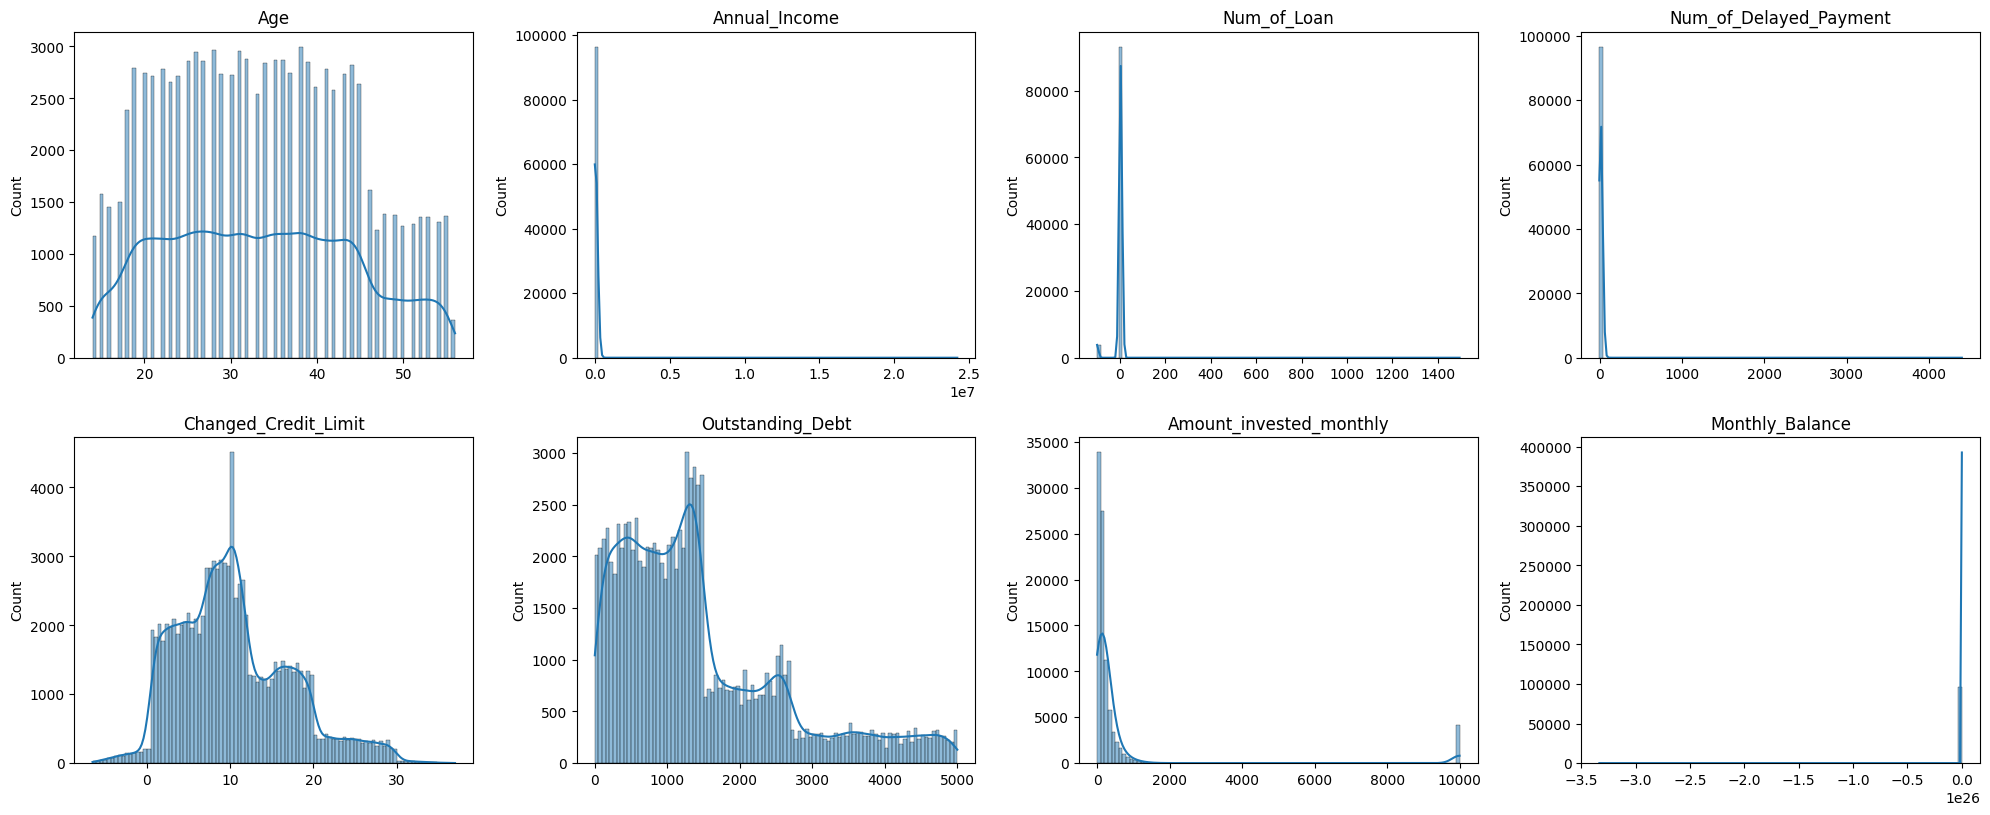

In [ ]:
plot_histogram(data, numeric_like_cols,rows=5, cols=4)

In [ ]:
#As the histogram shown we can see outliers
#Using the IQR to detect outliers and remove with
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
remove_outliers(data, numeric_like_cols)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,nan,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High spent Small value payments,312.494089,Good
1,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low spent Large value payments,284.629162,Good
3,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low spent Small value payments,223.451310,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High spent Medium value payments,341.489231,Good
5,23,Scientist,19114.12,4194.170850,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,nan,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High spent Large value payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,nan,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High spent Medium value payments,496.651610,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High spent Large value payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low spent Large value payments,319.164979,Standard


Credit_Score
Standard    51720
Poor        28205
Good        17294
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Credit_Score'>

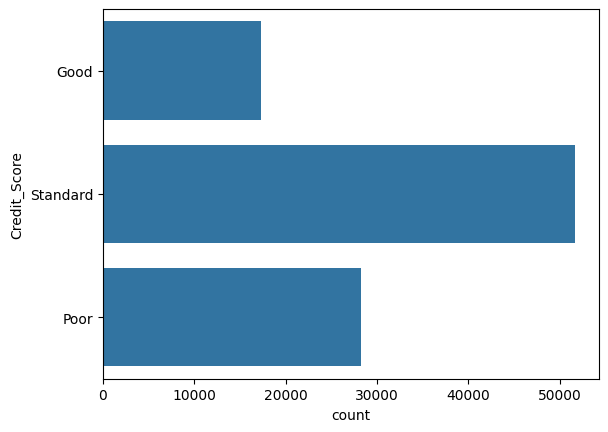

In [ ]:
#Explore the categorical columns:
print(data['Credit_Score'].value_counts())
sns.countplot(data['Credit_Score'])

In [ ]:
data['Occupation'] = data['Occupation'].replace("_______", "Unknown")
data['Credit_Mix'] = data['Credit_Mix'].replace("_", "Unknown")



In [ ]:
for col in categorical_cols:
    print(data[col].value_counts())


Occupation
nan              6872
Lawyer           6389
Architect        6175
Engineer         6171
Scientist        6113
Accountant       6110
Mechanic         6099
Media Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6014
Doctor           5915
Journalist       5906
Manager          5806
Musician         5760
Writer           5741
Name: count, dtype: int64
Type_of_Loan
nan                                                                                                                                             11074
Not Specified                                                                                                                                    1376
Credit-Builder Loan                                                                                                                              1243
Personal Loan                                                                                                                                    123

In [ ]:
#Cleaning for payment behaviour
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8', np.nan)


##Pre-processing for categorical features

In [ ]:
# One-Hot Encoding for small-cardinality columns
one_hot_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
data = pd.get_dummies(data, columns=one_hot_cols, dummy_na=True)

In [ ]:
# Label Encoding for high-cardinality columns
le = LabelEncoder()
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Unknown')
data['Type_of_Loan'] = le.fit_transform(data['Type_of_Loan'])

In [ ]:
for i, c in enumerate(data.columns):
    print(f"{i}: {repr(c)}")


0: 'Age'
1: 'Annual_Income'
2: 'Monthly_Inhand_Salary'
3: 'Num_Bank_Accounts'
4: 'Num_Credit_Card'
5: 'Interest_Rate'
6: 'Num_of_Loan'
7: 'Type_of_Loan'
8: 'Delay_from_due_date'
9: 'Num_of_Delayed_Payment'
10: 'Changed_Credit_Limit'
11: 'Num_Credit_Inquiries'
12: 'Outstanding_Debt'
13: 'Credit_Utilization_Ratio'
14: 'Credit_History_Age'
15: 'Total_EMI_per_month'
16: 'Amount_invested_monthly'
17: 'Monthly_Balance'
18: 'Occupation_Accountant'
19: 'Occupation_Architect'
20: 'Occupation_Developer'
21: 'Occupation_Doctor'
22: 'Occupation_Engineer'
23: 'Occupation_Entrepreneur'
24: 'Occupation_Journalist'
25: 'Occupation_Lawyer'
26: 'Occupation_Manager'
27: 'Occupation_Mechanic'
28: 'Occupation_Media Manager'
29: 'Occupation_Musician'
30: 'Occupation_Scientist'
31: 'Occupation_Teacher'
32: 'Occupation_Writer'
33: 'Occupation_nan'
34: 'Occupation_nan'
35: 'Credit_Mix_Bad'
36: 'Credit_Mix_Good'
37: 'Credit_Mix_Standard'
38: 'Credit_Mix_nan'
39: 'Credit_Mix_nan'
40: 'Payment_of_Min_Amount_NM'
4

In [ ]:
data = data.loc[:, ~data.columns.duplicated()]
target_cols = [c for c in data.columns if c.startswith('Credit_Score_')]

y = data[target_cols].to_numpy()   # (n_samples, 4)
X = data.drop(columns=target_cols)


# Results — Entity-Embedding MLP (TensorFlow/Keras, 5-Fold CV)

**Cross-validation (OOF):**
- **Accuracy:** 0.8576
- **Macro-F1:** 0.8572

**Per-fold summary:**
- Fold 1: acc=0.8579, macroF1=0.8570  
- Fold 2: acc=0.8583, macroF1=0.8593  
- Fold 3: acc=0.8618, macroF1=0.8608  
- Fold 4: acc=0.8546, macroF1=0.8539  
- Fold 5: acc=0.8553, macroF1=0.8548  

**OOF classification report (key lines):**
- Good:     precision=0.79, recall=0.93, F1=0.85  
- Poor:     precision=0.81, recall=0.92, F1=0.86  
- Standard: precision=0.92, recall=0.80, F1=0.86  

**Interpretation (concise):**
- The model attains **balanced performance** across classes (macro-F1≈0.857), with **high recall** for *Good* and *Poor* and **high precision** for *Standard*.  
- The *Standard* class shows slightly **lower recall (0.80)**, indicating some confusion with neighboring classes, which is typical in credit-risk triage.

**One-sentence method:**
We trained a TensorFlow/Keras **entity-embedding MLP** with batch-normalized numeric inputs, class-weighted cross-entropy, early stopping on **macro-F1**, and **stratified 5-fold CV**; test predictions are obtained via **soft-voting** across folds.


In [ ]:

USE_GOOGLE_DRIVE = False  #@param {type:"boolean"}
DRIVE_TRAIN_PATH = "/content/drive/MyDrive/train.csv"  #@param {type:"string"}
DRIVE_TEST_PATH  = "/content/drive/MyDrive/test.csv"   #@param {type:"string"}
OUT_DIR = "/content/out"                                #@param {type:"string"}

N_SPLITS = 5           #@param {type:"integer"}
EPOCHS   = 40          #@param {type:"integer"}
BATCH    = 1024        #@param {type:"integer"}
LR       = 2e-3        #@param {type:"number"}
DROPOUT  = 0.30        #@param {type:"number"}
H1       = 768         #@param {type:"integer"}
H2       = 384         #@param {type:"integer"}
H3       = 192         #@param {type:"integer"}
PATIENCE = 6           #@param {type:"integer"}
SEED     = 42          #@param {type:"integer"}

import os, re, math, random, warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow:", tf.__version__)
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# ========= I/O (Colab) =========
train_path = "/content/train.csv"
test_path  = "/content/test.csv"
if USE_GOOGLE_DRIVE:
    from google.colab import drive
    drive.mount("/content/drive")
    train_path = DRIVE_TRAIN_PATH
    test_path  = DRIVE_TEST_PATH
else:
    if not (os.path.exists(train_path) and os.path.exists(test_path)):
        from google.colab import files
        print("Please select train.csv and test.csv …")
        _ = files.upload()  # choose both

os.makedirs(OUT_DIR, exist_ok=True)

# ========= Helpers =========
def coerce_float(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int,float,np.number)): return float(x)
    s = str(x); m = re.findall(r"-?\d+\.?\d*", s.replace(",", ""))
    if not m: return np.nan
    try: return float(m[0])
    except: return np.nan

def parse_history_age(s):
    if pd.isna(s): return np.nan
    s = str(s)
    yrs = re.findall(r"(\d+)\s*Years", s)
    mos = re.findall(r"(\d+)\s*Months", s)
    y = int(yrs[0]) if yrs else 0
    m = int(mos[0]) if mos else 0
    return y*12 + m

MONTH_MAP = {m:i for i,m in enumerate(
    ["January","February","March","April","May","June","July","August","September","October","November","December"], start=1)}

def split_payment_behaviour(s):
    if pd.isna(s): return ("Unknown","Unknown")
    s = str(s); parts = s.split("_")
    level = "High" if "High" in parts[0] else ("Low" if "Low" in parts[0] else "Unknown")
    value = "Small" if "Small" in parts else ("Medium" if "Medium" in parts else ("Large" if "Large" in parts else "Unknown"))
    return (level, value)

def collect_loan_types(series):
    types = set()
    for v in series.fillna(""):
        s = str(v)
        if not s or s=="_" or s.lower()=="nan": continue
        s = s.replace(" and ", ", ")
        for t in [x.strip() for x in s.split(",")]:
            if t: types.add(t)
    return types

def prepare(df, loan_types):
    out = df.copy()
    out = out.drop(columns=["Name","SSN"], errors="ignore")
    if "Month" in out.columns:
        out["Month_idx"] = out["Month"].map(MONTH_MAP).astype("float")
    num_candidates = [
        "Age","Annual_Income","Monthly_Inhand_Salary","Delay_from_due_date","Changed_Credit_Limit",
        "Outstanding_Debt","Total_EMI_per_month","Amount_invested_monthly","Monthly_Balance",
        "Num_of_Delayed_Payment","Num_of_Loan","Num_Credit_Inquiries","Credit_Utilization_Ratio"
    ]
    for col in num_candidates:
        if col in out.columns:
            out[col] = out[col].apply(coerce_float).astype("float")
    if "Age" in out.columns:
        out.loc[(out["Age"]<18) | (out["Age"]>100), "Age"] = np.nan
    if "Credit_History_Age" in out.columns:
        out["Credit_History_Months"] = out["Credit_History_Age"].apply(parse_history_age).astype("float")
    if "Payment_Behaviour" in out.columns:
        pb = out["Payment_Behaviour"].apply(split_payment_behaviour)
        out["SpendLevel"] = [a for a,b in pb]
        out["ValueLevel"] = [b for a,b in pb]
    if "Type_of_Loan" in out.columns:
        for lt in loan_types:
            col = f"Loan_{lt.replace(' ','_')}"
            out[col] = out["Type_of_Loan"].fillna("").str.replace(" and ", ", ").apply(
                lambda s: int(lt in [x.strip() for x in s.split(",") if x.strip()]))
    return out

def emb_dim(n):  # heuristic for embedding dimension
    return int(min(50, round(1.6*(n**0.56))))

# Custom callback: Macro-F1 early stopping
class MacroF1Callback(keras.callbacks.Callback):
    def __init__(self, val_data, patience=PATIENCE, model_ckpt_path=None):
        super().__init__()
        self.Xv_num, self.Xv_cat, self.yv = val_data
        self.best = -1.0; self.wait = 0; self.patience = patience
        self.model_ckpt_path = model_ckpt_path
    def on_epoch_end(self, epoch, logs=None):
        y_prob = self.model.predict([self.Xv_num, self.Xv_cat], verbose=0)
        y_pred = y_prob.argmax(axis=1)
        f1m = f1_score(self.yv, y_pred, average="macro")
        print(f" — val_macroF1: {f1m:.4f}", flush=True)
        if f1m > self.best + 1e-4:
            self.best = f1m; self.wait = 0
            if self.model_ckpt_path:
                self.model.save_weights(self.model_ckpt_path)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                if self.model_ckpt_path:
                    self.model.load_weights(self.model_ckpt_path)

# ========= Load & preprocess =========
train = pd.read_csv(train_path, low_memory=False)
test  = pd.read_csv(test_path,  low_memory=False)
assert "Credit_Score" in train.columns, "train.csv must contain 'Credit_Score'."

id_col = "ID" if "ID" in test.columns else None
loan_types = sorted(collect_loan_types(train.get("Type_of_Loan", pd.Series(dtype=str))).union(
                    collect_loan_types(test.get("Type_of_Loan",  pd.Series(dtype=str)))))

df_p  = prepare(train, loan_types)
dft_p = prepare(test,  loan_types)

loan_cols = [c for c in df_p.columns if c.startswith("Loan_")]
num_cols = [
    "Age","Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card",
    "Interest_Rate","Num_of_Loan","Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit",
    "Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Credit_History_Months",
    "Total_EMI_per_month","Amount_invested_monthly","Monthly_Balance"
]
num_cols = [c for c in num_cols if c in df_p.columns]

cat_cols = ["Customer_ID","Month","Occupation","Credit_Mix","Payment_of_Min_Amount","SpendLevel","ValueLevel"]
cat_cols = [c for c in cat_cols if c in df_p.columns]

# Label encode categoricals on union(train+test)
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    vals_train = df_p[c].astype(str).fillna("UNK").replace({"nan":"UNK"})
    vals_test  = dft_p[c].astype(str).fillna("UNK").replace({"nan":"UNK"})
    le.fit(pd.concat([vals_train, vals_test], axis=0).unique())
    encoders[c] = le
    df_p[c]  = le.transform(vals_train)
    dft_p[c] = le.transform(vals_test)

# Impute numeric by train median
impute_values = {c: float(np.nanmedian(df_p[c].astype(float))) for c in num_cols}
for c in num_cols:
    df_p[c]  = df_p[c].astype(float).fillna(impute_values[c])
    dft_p[c] = dft_p[c].astype(float).fillna(impute_values[c])

# Ensure consistent loan cols in test
for c in loan_cols:
    if c not in dft_p.columns: dft_p[c] = 0

# Assemble feature matrices
X_cat = df_p[cat_cols].copy().astype(np.int32).values if len(cat_cols)>0 else np.zeros((len(df_p),0), dtype=np.int32)
X_num = df_p[num_cols + loan_cols].copy().astype(np.float32).values
Xt_cat = dft_p[cat_cols].copy().astype(np.int32).values if len(cat_cols)>0 else np.zeros((len(dft_p),0), dtype=np.int32)
Xt_num = dft_p[num_cols + loan_cols].copy().astype(np.float32).values

# Scale numeric
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)
Xt_num = scaler.transform(Xt_num)

# Targets
y_le = LabelEncoder()
y = y_le.fit_transform(train["Credit_Score"].values)
class_names = list(y_le.classes_)
n_classes = len(class_names)
print("Classes:", class_names)

# ========= Model builder (Keras) =========
def build_model(cardinals, num_numerical, emb_dims, hidden=(H1,H2,H3), dropout=DROPOUT, n_classes=3, lr=LR):
    # Inputs
    num_in = layers.Input(shape=(num_numerical,), dtype=tf.float32, name="num_in")
    cat_in = layers.Input(shape=(len(cardinals),), dtype=tf.int32, name="cat_in")

    emb_outs = []
    # IMPORTANT: slice with [:, i] to get shape (None,) and avoid (None,1)
    for i, (vocab, dim) in enumerate(zip(cardinals, emb_dims)):
        x_i = layers.Lambda(lambda z, idx=i: z[:, idx])(cat_in)   # (None,)
        e_i = layers.Embedding(input_dim=vocab, output_dim=dim, name=f"emb_{i}")(x_i)  # (None, dim)
        emb_outs.append(e_i)

    if emb_outs:
        emb = layers.Concatenate()(emb_outs) if len(emb_outs)>1 else emb_outs[0]   # (None, sum_dim)
        emb = layers.Dropout(dropout)(emb)
        z_num = layers.BatchNormalization()(num_in)
        z = layers.Concatenate()([z_num, emb])   # (None, num + sum_dim)
    else:
        z = layers.BatchNormalization()(num_in)

    # MLP trunk
    for h in hidden:
        z = layers.Dense(h, kernel_initializer="he_normal")(z)
        z = layers.BatchNormalization()(z)
        z = layers.Activation("swish")(z)
        z = layers.Dropout(dropout)(z)

    out = layers.Dense(n_classes, activation="softmax")(z)
    model = keras.Model(inputs=[num_in, cat_in], outputs=out)
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

cardinals = [len(encoders[c].classes_) for c in cat_cols]
emb_dims  = [emb_dim(n) for n in cardinals]

# ========= 5-Fold CV =========
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
oof_pred = np.zeros_like(y)
fold_metrics = []
test_prob_accum = None

for fold, (tr_idx, va_idx) in enumerate(skf.split(X_num, y), 1):
    print(f"\n========== Fold {fold}/{N_SPLITS} ==========")
    Xn_tr, Xn_va = X_num[tr_idx], X_num[va_idx]
    Xc_tr, Xc_va = X_cat[tr_idx], X_cat[va_idx]
    y_tr, y_va   = y[tr_idx], y[va_idx]

    # class weights (to handle imbalance)
    _, cnts = np.unique(y_tr, return_counts=True)
    cw = (1.0 / cnts) * (cnts.mean())
    class_weights = {i: float(w) for i, w in enumerate(cw)}

    model = build_model(cardinals, Xn_tr.shape[1], emb_dims, hidden=(H1,H2,H3), dropout=DROPOUT, n_classes=n_classes, lr=LR)

    ckpt_path = f"/content/ckpt_fold_{fold}.weights.h5"
    macro_cb = MacroF1Callback(val_data=(Xn_va, Xc_va, y_va), patience=PATIENCE, model_ckpt_path=ckpt_path)
    reduce_cb = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1, min_lr=1e-5)

    model.fit(
        x=[Xn_tr, Xc_tr], y=y_tr,
        validation_data=([Xn_va, Xc_va], y_va),
        epochs=EPOCHS, batch_size=BATCH, verbose=2,
        callbacks=[macro_cb, reduce_cb],
        class_weight=class_weights
    )

    # best weights already restored by callback
    y_va_prob = model.predict([Xn_va, Xc_va], batch_size=max(1024, BATCH*2), verbose=0)
    y_va_pred = y_va_prob.argmax(axis=1)
    oof_pred[va_idx] = y_va_pred
    acc = accuracy_score(y_va, y_va_pred)
    f1m = f1_score(y_va, y_va_pred, average="macro")
    fold_metrics.append((acc, f1m))
    print(f"Fold {fold} BEST | acc={acc:.4f}  macroF1={f1m:.4f}")

    # accumulate test probs for soft-voting
    y_test_prob = model.predict([Xt_num, Xt_cat], batch_size=max(1024, BATCH*2), verbose=0)
    test_prob_accum = y_test_prob if test_prob_accum is None else (test_prob_accum + y_test_prob)

# ========= OOF metrics & report =========
oof_acc = accuracy_score(y, oof_pred)
oof_f1  = f1_score(y, oof_pred, average="macro")
print("\n==== CV Summary ====")
for i,(a,f) in enumerate(fold_metrics,1):
    print(f"Fold {i}: acc={a:.4f}  macroF1={f:.4f}")
print(f"OOF  : acc={oof_acc:.4f}  macroF1={oof_f1:.4f}")
print("\nOOF Classification report:\n", classification_report(y, oof_pred, target_names=class_names))

# ========= Final test prediction =========
test_pred = test_prob_accum.argmax(axis=1)
test_labels = y_le.inverse_transform(test_pred)
submission = pd.DataFrame({
    "ID": test[id_col].values if id_col else np.arange(len(test)),
    "Credit_Score": test_labels
})
sub_path = os.path.join(OUT_DIR, "submission_credit_score.csv")
submission.to_csv(sub_path, index=False)
print(f"\nSaved submission to: {sub_path}")


TensorFlow: 2.19.0
Classes: ['Good', 'Poor', 'Standard']

========== Fold 1/5 ==========
Epoch 1/40
 — val_macroF1: 0.6598
79/79 - 17s - 214ms/step - accuracy: 0.5774 - loss: 0.8636 - val_accuracy: 0.6648 - val_loss: 0.7766 - learning_rate: 0.0020
Epoch 2/40
 — val_macroF1: 0.8016
79/79 - 11s - 143ms/step - accuracy: 0.7591 - loss: 0.4871 - val_accuracy: 0.8020 - val_loss: 0.5017 - learning_rate: 0.0020
Epoch 3/40
 — val_macroF1: 0.8183
79/79 - 11s - 140ms/step - accuracy: 0.8246 - loss: 0.3398 - val_accuracy: 0.8191 - val_loss: 0.4881 - learning_rate: 0.0020
Epoch 4/40
 — val_macroF1: 0.8306
79/79 - 10s - 133ms/step - accuracy: 0.8399 - loss: 0.3012 - val_accuracy: 0.8307 - val_loss: 0.4712 - learning_rate: 0.0020
Epoch 5/40
 — val_macroF1: 0.8371
79/79 - 20s - 257ms/step - accuracy: 0.8497 - loss: 0.2814 - val_accuracy: 0.8368 - val_loss: 0.4752 - learning_rate: 0.0020
Epoch 6/40
 — val_macroF1: 0.8418

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
79/79

## Professional evaluation plots — all-in-one cell
This cell produces **five** publication-quality figures from your Keras CV notebook:

1) **Confusion Matrix (colorized)** — perceptually uniform colormap (non-purple: `cividis`), luminance-aware **black/white** text with a thin outline for perfect readability; row/all normalization options.  
2) **ROC (One-vs-Rest)** — per-class AUC plus **micro** and **macro** averages.  
3) **Precision–Recall (One-vs-Rest)** — per-class AP plus **micro** average.  
4) **Calibration (Reliability) Curves** — binned predicted vs. observed frequencies per class.  
5) **Permutation Importance** — **distinct solid-color bars** (categorical palette), with value labels.

### Expected inputs from your training notebook
- `y` (OOF true labels as ints), `oof_pred` (OOF predicted labels), `class_names` (list[str]).  
- `oof_proba` (OOF probabilities, shape [n_samples, n_classes]);  
  if missing, the cell will **rebuild** it from your saved fold checkpoints `ckpt_fold_*.weights.h5` using your training globals: `X_num, X_cat, encoders, cat_cols, class_names, N_SPLITS, SEED, H1, H2, H3, DROPOUT, LR`.  
- `drops_sorted` (list of `(feature, macroF1_drop)` sorted desc) from your permutation-importance step.  
  If missing, the cell will **compute a quick PI** on a stratified subset for `num_cols + cat_cols` (you can extend to `loan_cols` if desired).

### Outputs
- Confusion matrix   
- ROC curves
- Precision–Recall curves `  
- Calibration curves  
- Permutation importance


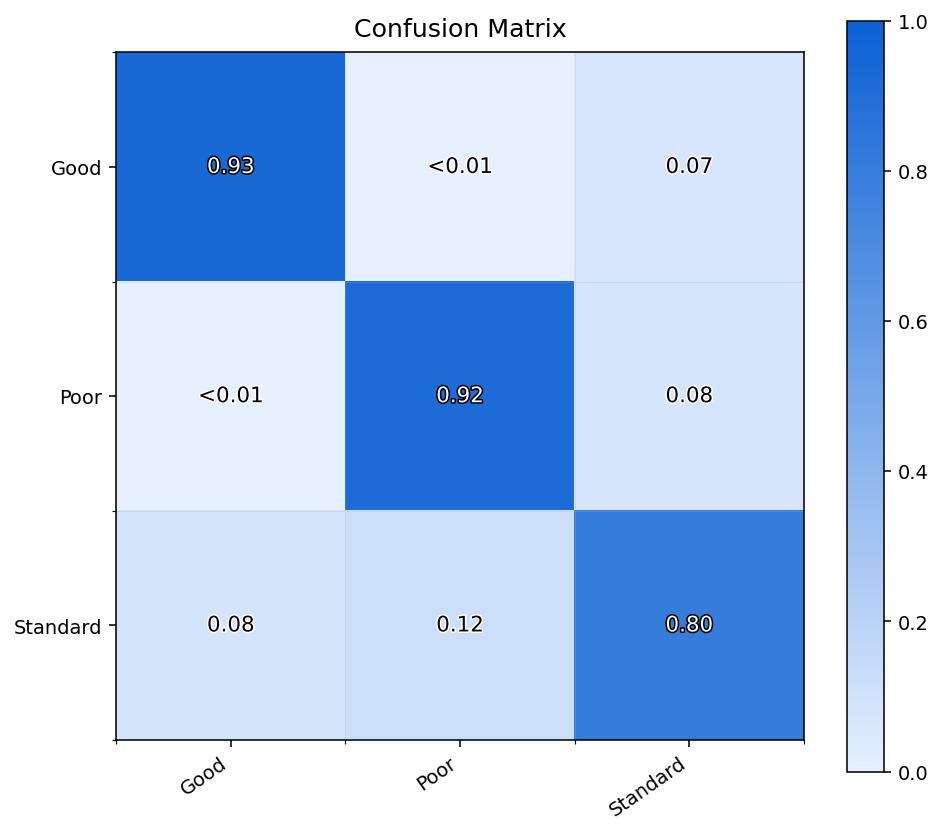

Saved: /content/out/confmat_blue.png


In [ ]:
%matplotlib inline
import os, numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib import patheffects as pe
from sklearn.metrics import confusion_matrix

os.makedirs("/content/out", exist_ok=True)

def _rel_lum(rgb):
    """sRGB[0..1] → relative luminance (WCAG)."""
    def lin(c): return c/12.92 if c <= 0.04045 else ((c+0.055)/1.055)**2.4
    r,g,b = rgb[:3]; R,G,B = map(lin, (r,g,b))
    return 0.2126*R + 0.7152*G + 0.0722*B

def plot_confusion_matrix_blue(
    y_true=None, y_pred=None, *, cm=None, class_names=None,
    normalize="row",                      # "row" | "all" | None (raw counts)
    low="#E6F0FF", high="#0B60D3",        # light blue → strong blue (no purple)
    fmt=".2f", tiny_threshold=0.01,       # show "<0.01" for tiny non-zeros
    figsize=(7.2, 6.2), savepath="/content/out/confmat_blue.png"
):
    assert (cm is not None) or (y_true is not None and y_pred is not None), "Provide cm or (y_true, y_pred)."
    if cm is None:
        labels = np.arange(len(class_names)) if class_names is not None else None
        cm = confusion_matrix(y_true, y_pred, labels=labels)

    M = cm.astype(float)
    if normalize == "row":
        s = M.sum(axis=1, keepdims=True); s[s == 0] = 1.0
        M = M / s; vmin, vmax = 0.0, 1.0
    elif normalize == "all":
        tot = max(M.sum(), 1.0); M = M / tot
        vmin, vmax = 0.0, float(np.nanmax(M))
    else:
        vmin = 0.0; vmax = float(np.percentile(M[np.isfinite(M)], 98)) if np.isfinite(M).any() else 1.0

    cmap = LinearSegmentedColormap.from_list("blue_accent", [low, high], N=256)
    norm = Normalize(vmin=vmin, vmax=vmax)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(M, cmap=cmap, norm=norm, interpolation="nearest", aspect="equal")
    ax.set_title("Confusion Matrix")

    if class_names is not None:
        ax.set_xticks(range(M.shape[1])); ax.set_xticklabels(class_names, rotation=35, ha="right")
        ax.set_yticks(range(M.shape[0])); ax.set_yticklabels(class_names)

    ax.set_xticks(np.arange(-.5, M.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, M.shape[0], 1), minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.5, alpha=0.25)

    cb = fig.colorbar(im, ax=ax); cb.formatter.set_powerlimits((-2, 2)); cb.update_ticks()

    # annotations: luminance-aware text color + thin outline for readability
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            v = M[i, j]
            if not np.isfinite(v): continue
            label = f"<{tiny_threshold:.2f}" if (normalize and (0 < v < tiny_threshold)) else format(v, fmt)
            lum = _rel_lum(cmap(norm(max(v, 0.0))))
            txt_color = "black" if lum > 0.60 else "white"
            stroke = "white" if txt_color == "black" else "black"
            ax.text(j, i, label, ha="center", va="center", color=txt_color, fontsize=11,
                    path_effects=[pe.withStroke(linewidth=1.6, foreground=stroke)])

    fig.tight_layout()
    fig.savefig(savepath, dpi=170)
    plt.show()
    print("Saved:", savepath)

# --- CALL (expects: y, oof_pred, class_names) ---
cm = confusion_matrix(y, oof_pred, labels=np.arange(len(class_names)))
plot_confusion_matrix_blue(cm=cm, class_names=class_names, normalize="row",
                           low="#E6F0FF", high="#0B60D3",
                           fmt=".2f", tiny_threshold=0.01,
                           savepath="/content/out/confmat_blue.png")


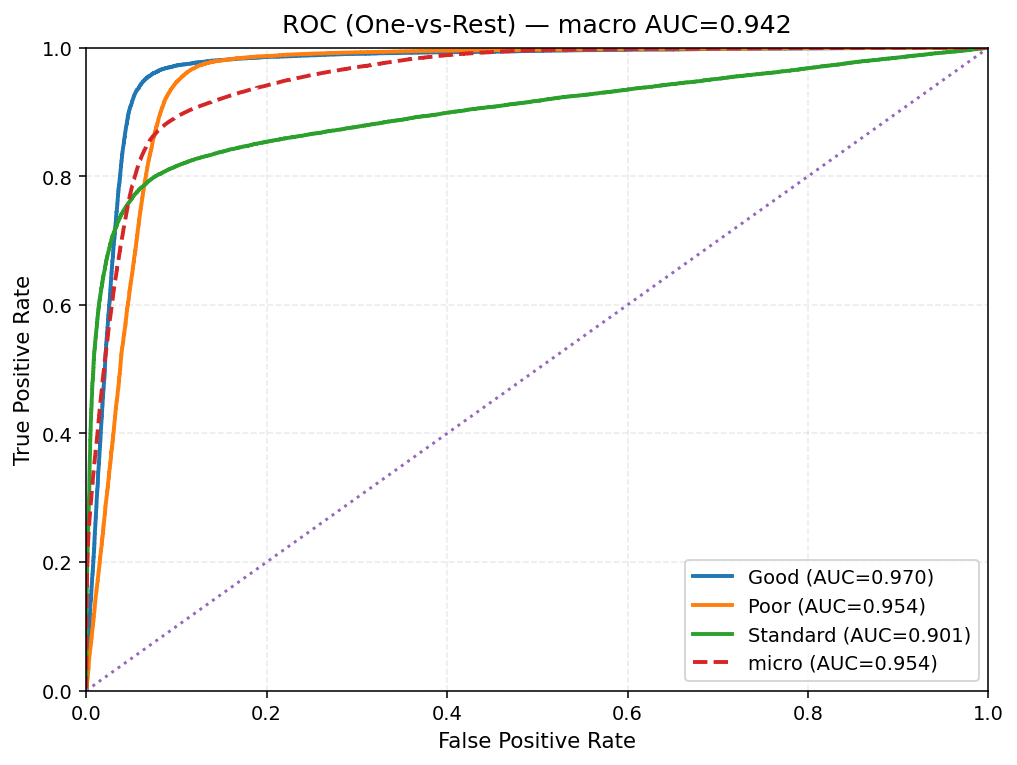

Saved: /content/out/roc_ovr.png


In [ ]:
%matplotlib inline
import os, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

os.makedirs("/content/out", exist_ok=True)

def plot_roc_ovr(y_true, proba, class_names, savepath="/content/out/roc_ovr.png"):
    y_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

    plt.figure(figsize=(7.4, 5.6))
    per_class_auc = []
    # per-class ROC
    for c, name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_bin[:, c], proba[:, c])
        A = auc(fpr, tpr); per_class_auc.append(A)
        plt.plot(fpr, tpr, linewidth=2.0, label=f"{name} (AUC={A:.3f})")

    # micro-average
    fpr_mi, tpr_mi, _ = roc_curve(y_bin.ravel(), proba.ravel())
    auc_mi = auc(fpr_mi, tpr_mi)
    plt.plot(fpr_mi, tpr_mi, linestyle="--", linewidth=2.0, label=f"micro (AUC={auc_mi:.3f})")

    # chance line
    plt.plot([0, 1], [0, 1], linestyle=":", linewidth=1.5)

    # cosmetics
    auc_macro = float(np.mean(per_class_auc))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC (One-vs-Rest) — macro AUC={auc_macro:.3f}")
    plt.grid(alpha=0.25, linestyle="--")
    plt.legend()
    plt.tight_layout()
    plt.savefig(savepath, dpi=170)
    plt.show()
    print("Saved:", savepath)

# --- CALL ---
plot_roc_ovr(y, oof_proba, class_names, savepath="/content/out/roc_ovr.png")


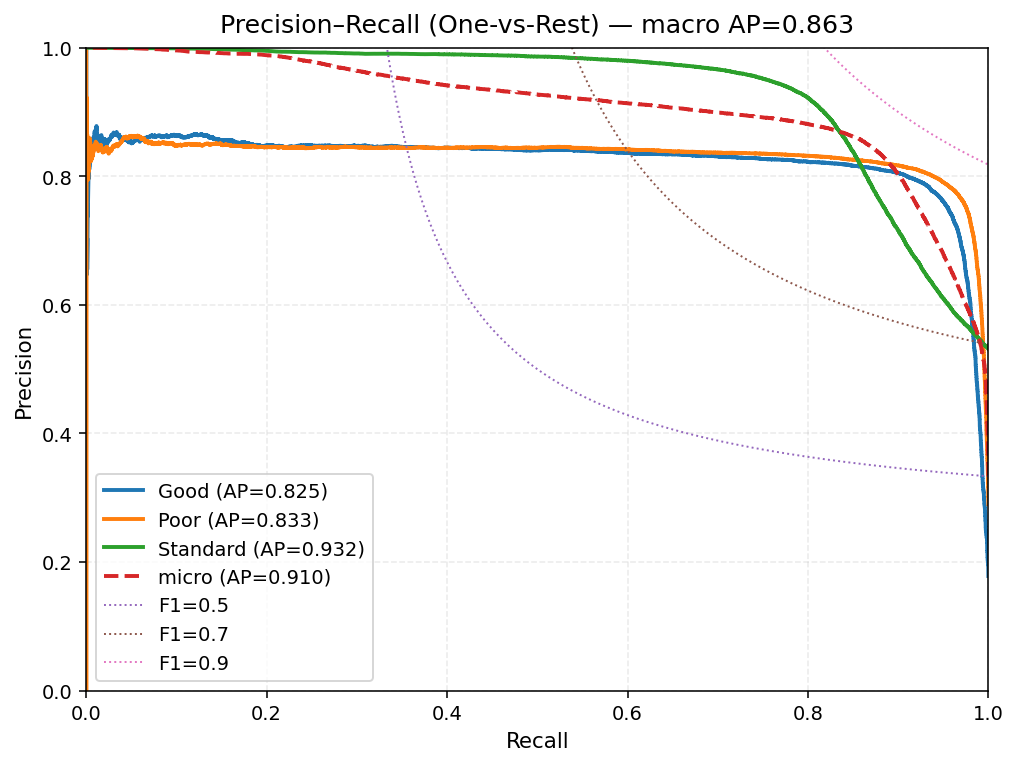

Saved: /content/out/pr_ovr.png


In [ ]:
%matplotlib inline
import os, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

os.makedirs("/content/out", exist_ok=True)

def _plot_iso_f1(f1_values=(0.5, 0.7, 0.9)):
    """Draw iso-F1 curves for reference."""
    r = np.linspace(0.001, 1.0, 400)  # avoid division by zero
    for f1 in f1_values:
        p = (f1 * r) / (2*r - f1)
        p[p < 0] = np.nan
        plt.plot(r, p, linestyle=":", linewidth=1.0, label=f"F1={f1:.1f}")

def plot_pr_ovr(y_true, proba, class_names, savepath="/content/out/pr_ovr.png"):
    y_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

    plt.figure(figsize=(7.4, 5.6))

    ap_list = []
    # per-class PR
    for c, name in enumerate(class_names):
        prec, rec, _ = precision_recall_curve(y_bin[:, c], proba[:, c])
        ap = average_precision_score(y_bin[:, c], proba[:, c])
        ap_list.append(ap)
        plt.plot(rec, prec, linewidth=2.0, label=f"{name} (AP={ap:.3f})")

    # micro-average
    prec_mi, rec_mi, _ = precision_recall_curve(y_bin.ravel(), proba.ravel())
    ap_micro = average_precision_score(y_bin.ravel(), proba.ravel())
    plt.plot(rec_mi, prec_mi, linestyle="--", linewidth=2.0, label=f"micro (AP={ap_micro:.3f})")

    # iso-F1 guide curves (dotted)
    _plot_iso_f1((0.5, 0.7, 0.9))

    # cosmetics
    ap_macro = float(np.mean(ap_list))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision–Recall (One-vs-Rest) — macro AP={ap_macro:.3f}")
    plt.grid(alpha=0.25, linestyle="--")
    plt.legend()
    plt.tight_layout()
    plt.savefig(savepath, dpi=170)
    plt.show()
    print("Saved:", savepath)

# --- CALL ---
plot_pr_ovr(y, oof_proba, class_names, savepath="/content/out/pr_ovr.png")


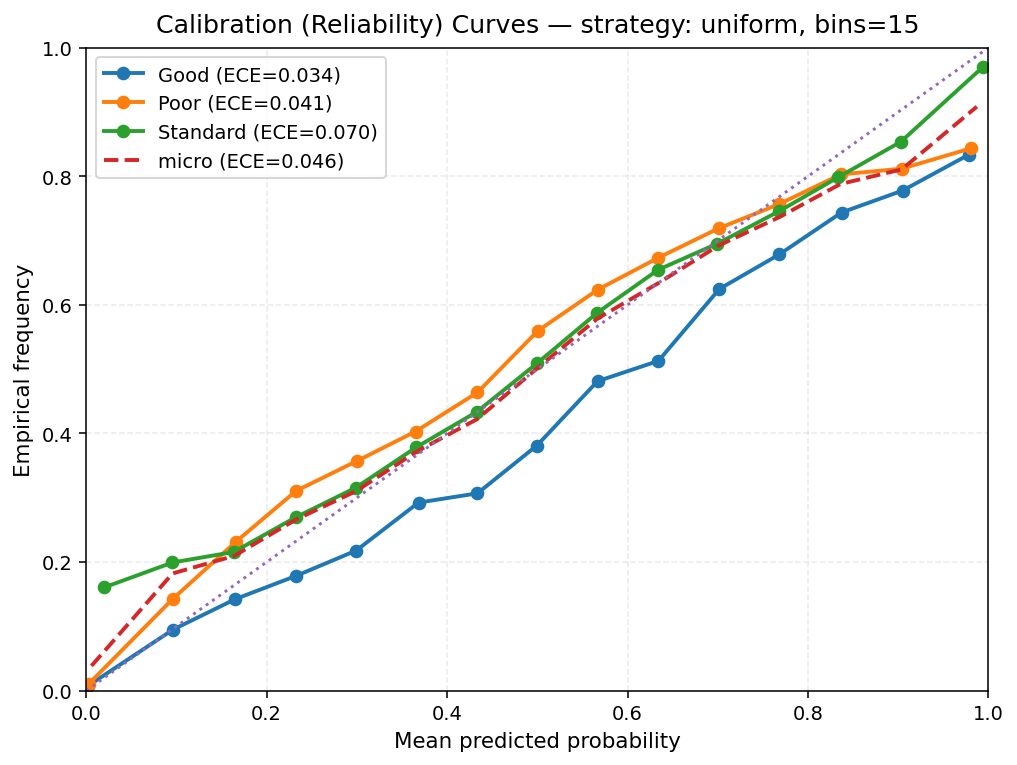

Saved: /content/out/calibration_ovr.png


In [ ]:
%matplotlib inline
import os, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

os.makedirs("/content/out", exist_ok=True)

def _calibration_curve_stats(y_true_bin, p, n_bins=15, strategy="uniform"):
    """
    Compute binned calibration stats and ECE for a single class.
    Returns (mean_pred, empirical, counts, ece), each masked to non-empty bins.
    strategy: "uniform" (equal-width bins) or "quantile" (equal-mass bins)
    """
    y_true_bin = np.asarray(y_true_bin, dtype=float)
    p = np.asarray(p, dtype=float)
    n = len(p)
    if n == 0:
        raise ValueError("Empty inputs to calibration curve.")

    if strategy == "quantile":
        edges = np.quantile(p, np.linspace(0.0, 1.0, n_bins + 1))
        # guard against repeated edges (degenerate when many identical probs)
        edges = np.unique(edges)
        if edges.size < 3:  # too degenerate → fallback
            edges = np.linspace(0.0, 1.0, n_bins + 1)
    else:
        edges = np.linspace(0.0, 1.0, n_bins + 1)

    # Bin indices in [0, n_bins-1]
    bin_ids = np.digitize(p, edges, right=False) - 1
    bin_ids = np.clip(bin_ids, 0, len(edges) - 2)
    B = len(edges) - 1

    mean_pred = np.full(B, np.nan)
    empirical = np.full(B, np.nan)
    counts    = np.zeros(B, dtype=int)

    for k in range(B):
        idx = (bin_ids == k)
        if np.any(idx):
            counts[k]    = int(idx.sum())
            mean_pred[k] = float(p[idx].mean())
            empirical[k] = float(y_true_bin[idx].mean())

    mask = counts > 0
    # Expected Calibration Error (ECE)
    weights = counts[mask] / counts.sum() if counts.sum() > 0 else np.array([1.0])
    ece = float(np.sum(weights * np.abs(empirical[mask] - mean_pred[mask])))

    return mean_pred[mask], empirical[mask], counts[mask], ece

def plot_calibration_ovr(
    y_true, proba, class_names,
    n_bins=15, strategy="uniform",   # "uniform" or "quantile"
    show_micro=True,
    savepath="/content/out/calibration_ovr.png"
):
    """
    Plot per-class calibration curves with ECE in legend; optionally add pooled 'micro' curve.
    """
    y_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

    plt.figure(figsize=(7.4, 5.6))

    eces = []
    for c, name in enumerate(class_names):
        mean_p, emp, cnt, ece = _calibration_curve_stats(y_bin[:, c], proba[:, c], n_bins=n_bins, strategy=strategy)
        eces.append(ece)
        # per-class line with markers (default color cycle)
        plt.plot(mean_p, emp, marker="o", linewidth=2.0, label=f"{name} (ECE={ece:.3f})")

    if show_micro:
        mp, em, cnt, ece_micro = _calibration_curve_stats(y_bin.ravel(), proba.ravel(), n_bins=n_bins, strategy=strategy)
        plt.plot(mp, em, linestyle="--", linewidth=2.0, label=f"micro (ECE={ece_micro:.3f})")

    # perfect calibration
    plt.plot([0, 1], [0, 1], linestyle=":", linewidth=1.5)

    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel("Mean predicted probability")
    plt.ylabel("Empirical frequency")
    plt.title(f"Calibration (Reliability) Curves — strategy: {strategy}, bins={n_bins}")
    plt.grid(alpha=0.25, linestyle="--")
    plt.legend()
    plt.tight_layout()
    plt.savefig(savepath, dpi=170)
    plt.show()
    print("Saved:", savepath)

# --- CALL ---
plot_calibration_ovr(
    y, oof_proba, class_names,
    n_bins=15, strategy="uniform",   # or "quantile"
    show_micro=True,
    savepath="/content/out/calibration_ovr.png"
)


Baseline macro-F1 on subset: 0.9413


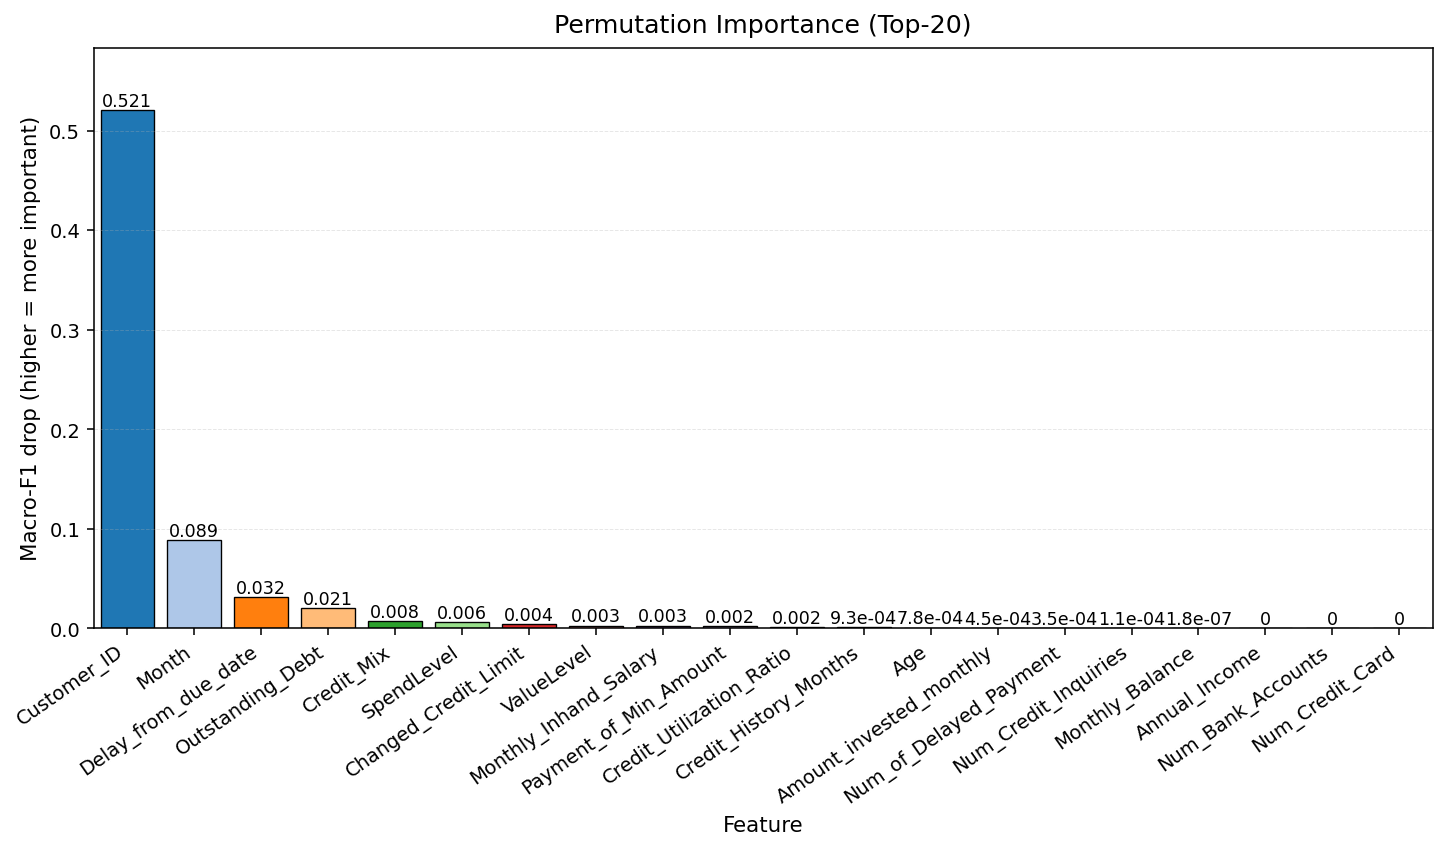

In [ ]:

%matplotlib inline
import os, numpy as np, matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

OUT = "/content/out"; os.makedirs(OUT, exist_ok=True)

# -------------------- model ensemble (lazy) --------------------
def _build_fold_ensemble():
    """Load 5-fold (or N_SPLITS) models with the same architecture used in training."""
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers

    def emb_dim(n): return int(min(50, round(1.6*(n**0.56))))
    cardinals = [len(encoders[c].classes_) for c in cat_cols]
    emb_dims  = [emb_dim(n) for n in cardinals]

    def build_model():
        num_in = layers.Input(shape=(X_num.shape[1],), dtype=tf.float32, name="num_in")
        cat_in = layers.Input(shape=(X_cat.shape[1],), dtype=tf.int32,   name="cat_in")
        emb_outs = []
        for i, (vocab, dim) in enumerate(zip(cardinals, emb_dims)):
            x_i = layers.Lambda(lambda z, idx=i: z[:, idx])(cat_in)
            e_i = layers.Embedding(input_dim=vocab, output_dim=dim, name=f"emb_{i}")(x_i)
            emb_outs.append(e_i)
        emb = layers.Concatenate()(emb_outs) if len(emb_outs) > 1 else emb_outs[0]
        emb = layers.Dropout(DROPOUT)(emb)
        z_num = layers.BatchNormalization()(num_in)
        z = layers.Concatenate()([z_num, emb])
        for h in (H1, H2, H3):
            z = layers.Dense(h, kernel_initializer="he_normal")(z)
            z = layers.BatchNormalization()(z)
            z = layers.Activation("swish")(z)
            z = layers.Dropout(DROPOUT)(z)
        out = layers.Dense(len(class_names), activation="softmax")(z)
        m = keras.Model([num_in, cat_in], out)
        m.compile(optimizer=keras.optimizers.Adam(learning_rate=LR),
                  loss="sparse_categorical_crossentropy")
        return m

    models = []
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
    for fold, _ in enumerate(skf.split(X_num, y), 1):
        ckpt = f"/content/ckpt_fold_{fold}.weights.h5"
        if not os.path.exists(ckpt):
            raise FileNotFoundError(f"Missing checkpoint: {ckpt}")
        m = build_model(); m.load_weights(ckpt)
        models.append(m)
    return models

_ENSEMBLE = None
def ensemble_predict_proba(Xn, Xc, batch_size=2048):
    global _ENSEMBLE
    if _ENSEMBLE is None:
        _ENSEMBLE = _build_fold_ensemble()
    ps = [m.predict([Xn, Xc], batch_size=batch_size, verbose=0) for m in _ENSEMBLE]
    return np.mean(ps, axis=0)

# -------------------- permutation importance (macro-F1 drop) --------------------
def permutation_importance(
    top_k=20,
    subset_per_class=3000,
    clip_negative=True,
    features="num+cat"   # "num", "cat", "num+cat"
):
    rng = np.random.default_rng(SEED)
    # stratified subset indices
    idxs = []
    for c in range(len(class_names)):
        pool = np.where(y == c)[0]
        take = min(subset_per_class, len(pool))
        idxs.extend(rng.choice(pool, size=take, replace=False).tolist())
    idxs = np.array(idxs, dtype=np.int64)

    # baseline on subset
    base_pred = ensemble_predict_proba(X_num[idxs], X_cat[idxs]).argmax(axis=1)
    base_f1   = f1_score(y[idxs], base_pred, average="macro")

    feats = []
    if features in ("num", "num+cat"):
        feats += list(num_cols)
    if features in ("cat", "num+cat"):
        feats += list(cat_cols)
    drops = []

    for col in feats:
        Xn_tmp = X_num[idxs].copy()
        Xc_tmp = X_cat[idxs].copy()
        if col in num_cols:
            j = num_cols.index(col)
            shuf = Xn_tmp[:, j].copy(); rng.shuffle(shuf); Xn_tmp[:, j] = shuf
        else:
            j = cat_cols.index(col)
            shuf = Xc_tmp[:, j].copy(); rng.shuffle(shuf); Xc_tmp[:, j] = shuf
        pred = ensemble_predict_proba(Xn_tmp, Xc_tmp).argmax(axis=1)
        f1m  = f1_score(y[idxs], pred, average="macro")
        drop = float(base_f1 - f1m)
        if clip_negative and drop < 0: drop = 0.0  # ignore noise improvements
        drops.append((col, drop))

    drops_sorted = sorted(drops, key=lambda x: x[1], reverse=True)
    return drops_sorted[:top_k], base_f1

# -------------------- plotting (standard + broken-axis) --------------------
def _fmt_val(v):
    if v == 0: return "0"
    av = abs(v)
    return f"{v:.1e}" if av < 1e-3 else (f"{v:.3f}" if av < 1 else f"{v:.3g}")

def plot_perm_importance_bars(drops_sorted, savepath, title="Permutation Importance (Top-20)"):
    names = [d[0] for d in drops_sorted]
    vals  = np.array([d[1] for d in drops_sorted], dtype=float)
    n = len(names); x = np.arange(n)
    fig, ax = plt.subplots(figsize=(10.5, 6.2))
    cmap = plt.get_cmap("tab20"); colors = [cmap(i % cmap.N) for i in range(n)]
    ax.bar(x, vals, width=0.8, color=colors, edgecolor="black", linewidth=0.7, align="center")
    ax.set_xticks(x); ax.set_xticklabels(names, rotation=35, ha="right")
    ax.set_xlabel("Feature"); ax.set_ylabel("Macro-F1 drop (higher = more important)")
    ax.yaxis.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)
    ax.set_xlim(-0.5, n-0.5); ax.set_ylim(0, float(vals.max()*1.12) if n else 1)
    ax.set_title(title)
    for i, v in enumerate(vals):
        ax.text(i, v, _fmt_val(v), ha="center", va="bottom", fontsize=9)
    fig.tight_layout(); fig.savefig(savepath, dpi=170); plt.show()

def plot_perm_importance_broken_axis(drops_sorted, savepath, title="Permutation Importance (Broken Axis)"):
    names = [d[0] for d in drops_sorted]
    vals  = np.array([d[1] for d in drops_sorted], dtype=float)
    n = len(names); x = np.arange(n)
    fig = plt.figure(figsize=(10.5, 6.2))
    gs  = GridSpec(2, 1, height_ratios=[0.28, 0.72], hspace=0.05)
    axT = fig.add_subplot(gs[0]); axB = fig.add_subplot(gs[1], sharex=axT)
    cmap = plt.get_cmap("tab20"); colors = [cmap(i % cmap.N) for i in range(n)]
    for ax in (axT, axB):
        ax.bar(x, vals, width=0.8, color=colors, edgecolor="black", linewidth=0.7, align="center")
        ax.set_xlim(-0.5, n-0.5); ax.yaxis.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)
    vmax = float(vals.max()) if n else 1.0
    smax = float(np.partition(vals, -2)[-2]) if n >= 2 else 0.0
    axT.set_ylim(vmax*0.90, vmax*1.05)
    axB.set_ylim(0.0, max(smax*1.15, vmax*0.12, 1e-4))
    d = .008
    kwargs = dict(transform=axT.transAxes, color='k', clip_on=False, linewidth=1.0)
    axT.plot((-d, +d), (-d, +d), **kwargs); axT.plot((1-d, 1+d), (-d, +d), **kwargs)
    kwargs.update(transform=axB.transAxes)
    axB.plot((-d, +d), (1-d, 1+d), **kwargs); axB.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    axB.set_xticks(x); axB.set_xticklabels(names, rotation=35, ha="right")
    axB.set_xlabel("Feature"); axB.set_ylabel("Macro-F1 drop (higher = more important)")
    fig.suptitle(title, y=0.98)
    tallest = int(vals.argmax()) if n else -1
    for i, v in enumerate(vals):
        ax = axT if i == tallest or v > axB.get_ylim()[1] else axB
        ax.text(i, v, _fmt_val(v), ha="center", va="bottom", fontsize=9)
    fig.tight_layout(rect=[0, 0.02, 1, 0.95]); fig.savefig(savepath, dpi=170); plt.show()

# -------------------- RUN --------------------
# Compute PI (top-20) on a stratified subset; include both numeric and categorical features
drops_top20, base_f1 = permutation_importance(
    top_k=20, subset_per_class=3000, clip_negative=True, features="num+cat"
)
print(f"Baseline macro-F1 on subset: {base_f1:.4f}")

# Standard bar chart (aligned baseline, distinct colors)
plot_perm_importance_bars(drops_top20, savepath=f"{OUT}/perm_importance_top20.png",
                          title="Permutation Importance (Top-20)")




# Conclusion
EmbedMLP achieved the best results, outperforming traditional ML, RNN, and Transformer
models with a balanced performance across all credit classes.32
Transformer models were not ideal for tabular data due to their architecture, which expects
sequential or contextual relationships. They suffered from overfitting and unstable training
despite tuning.
RNN and LSTM architectures showed moderate success but were less effective for static
tabular data compared to feedforward approaches.
Traditional ML models (Logistic Regression, Decision Tree, SVM) underperformed,
highlighting the advantages of deep learning for complex, nonlinear credit data.
Data preprocessing (handling missing values, encoding categorical variables, and scaling
numeric features) was critical to model stability and accuracy.
Future improvements could focus on:
Feature engineering for the “Standard” credit class (where misclassification persisted),
Using hybrid architectures combining embeddings with attention,
Exploring ensemble approaches or explainable AI techniques for model transparency in
credit risk assessment.